In [44]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.preprocessing import Imputer
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.preprocessing import StandardScaler
#from sklearn.feature_selection import VarianceThreshold
#from sklearn.feature_selection import SelectFromModel
#from sklearn.utils import shuffle
#from sklearn.ensemble import RandomForestClassifier

#pd.set_option('display.max_columns', 100)

### 패키지 로드
기존 코드의 라이브러리 임포트는 구버전이라 신버전으로 아래 다시 필사함

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100) 

In [46]:
DEBUG = True

In [47]:
if DEBUG:
    NROWS = 500000
else:
    NROWS = None

### 데이터 로드
10000개 행만 불러오기

In [48]:
%%time
data_path = '/kaggle/input/porto-seguro-safe-driver-prediction/'
train = pd.read_csv(data_path + 'train.csv', nrows=NROWS)
test = pd.read_csv(data_path + 'test.csv', nrows=NROWS)
train = train.sample(frac=0.1) # 랜덤으로 10% 샘플링

CPU times: user 7.14 s, sys: 1.97 s, total: 9.1 s
Wall time: 9.22 s


데이터 샘플링이 unbalance할거 같으면 아래 코드 사용하면 됨

In [49]:
#from sklearn.model_selection import StratifiedKFold

#fold = StratifiedKFold(n_splits=10, random_state=1900, shuffle=True)

#for trn_idx, val_idx in fold.split(train, train['target']):
 #   break
    
#train = train.iloc[trn_idx]

In [50]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
83925,209881,0,4,1,1,1,0,0,0,1,0,0,0,0,0,0,10,1,0,0,0.8,1.2,-1.000000,10,1,-1,0,1,0,1,1,0,1,66,1,0.399875,0.688167,0.381707,2.645751,0.3,0.7,0.4,2,1,9,4,8,3,10,3,1,6,10,0,1,1,0,1,0
401480,1003299,0,2,1,5,0,0,1,0,0,0,0,0,0,0,0,10,0,0,0,0.7,0.4,1.124166,11,0,-1,0,-1,10,1,1,2,1,83,2,0.424264,0.901262,0.418569,2.828427,0.9,0.1,0.1,4,2,9,5,8,3,6,6,0,2,4,0,1,0,0,0,0
48589,121883,0,1,1,4,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0.9,0.2,0.478278,11,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.639311,0.347275,3.316625,0.2,0.7,0.4,3,3,8,2,11,3,5,7,0,3,6,0,1,1,0,0,0
146492,366070,0,2,1,2,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.9,0.9,1.203121,7,0,-1,0,-1,1,1,1,2,1,104,2,0.435890,0.873804,0.414729,3.162278,0.5,0.8,0.6,1,3,7,4,10,3,12,8,2,0,5,0,0,1,0,0,0
296066,739734,0,1,1,2,1,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0.0,1.2,0.632456,6,1,-1,0,0,1,1,1,0,1,10,2,0.316228,0.723242,0.381445,3.316625,0.4,0.1,0.1,0,2,6,3,12,2,5,10,1,6,9,0,1,0,0,1,0


In [51]:
cat_cols = [col for col in train.columns if 'cat' in col]
cat_cols

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [52]:
for col in cat_cols:
    print(col, train[col].nunique())

ps_ind_02_cat 5
ps_ind_04_cat 3
ps_ind_05_cat 8
ps_car_01_cat 13
ps_car_02_cat 2
ps_car_03_cat 3
ps_car_04_cat 10
ps_car_05_cat 3
ps_car_06_cat 18
ps_car_07_cat 3
ps_car_08_cat 2
ps_car_09_cat 6
ps_car_10_cat 3
ps_car_11_cat 104


In [53]:
train.shape

(50000, 59)

In [54]:
test.shape

(500000, 58)

In [55]:
# 중복된 행이 있으면 삭제
train.drop_duplicates()
train.shape

(50000, 59)

중복된 행 없음

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 83925 to 434212
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              50000 non-null  int64  
 1   target          50000 non-null  int64  
 2   ps_ind_01       50000 non-null  int64  
 3   ps_ind_02_cat   50000 non-null  int64  
 4   ps_ind_03       50000 non-null  int64  
 5   ps_ind_04_cat   50000 non-null  int64  
 6   ps_ind_05_cat   50000 non-null  int64  
 7   ps_ind_06_bin   50000 non-null  int64  
 8   ps_ind_07_bin   50000 non-null  int64  
 9   ps_ind_08_bin   50000 non-null  int64  
 10  ps_ind_09_bin   50000 non-null  int64  
 11  ps_ind_10_bin   50000 non-null  int64  
 12  ps_ind_11_bin   50000 non-null  int64  
 13  ps_ind_12_bin   50000 non-null  int64  
 14  ps_ind_13_bin   50000 non-null  int64  
 15  ps_ind_14       50000 non-null  int64  
 16  ps_ind_15       50000 non-null  int64  
 17  ps_ind_16_bin   50000 non-null 

### 메타데이터

In [57]:
data = []

for f in train.columns:
    if f in 'target':
        role == 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
        
    # level 정의
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'
        
    # id를 제외하고 모든 변수에 keep을 True로 설정    
    keep = True
    if f == 'id':
        keep = False
    
    # 데이터 타입 정의
    dtype = train[f].dtype
    
    # 변수에 대한 모든 메타데이터를 포함하는 딕셔너리 생성
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [58]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,id,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [59]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [60]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,binary,1
1,id,nominal,1
2,input,binary,17
3,input,interval,10
4,input,nominal,14
5,input,ordinal,16


describe 라는 메소드를 사용할 수 있다. 그러나, 카테고리 데이터에는 평균, 표준편차 등등이 필요없다. 카테고리 데이터는 나중에 살펴보자.

위의 meta를 통해 덕분에 다양한 변수들을 쉽게 고를 수 있다. 

### Interval variables

In [61]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.611006,0.440672,0.557359,0.379668,0.812448,0.277235,3.066502,0.450680,0.448362,0.449680
std,0.288200,0.405921,0.790460,0.058086,0.222923,0.355445,0.735525,0.286941,0.287920,0.287278
min,0.000000,0.000000,-1.000000,0.141421,0.309258,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.528559,0.316228,0.670913,0.333916,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.722409,0.374166,0.766231,0.368782,3.316625,0.500000,0.400000,0.400000
75%,0.900000,0.600000,1.008480,0.400000,0.905573,0.397492,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,2.947457,1.264911,3.253698,0.631664,3.741657,0.900000,0.900000,0.900000


##### reg variables
- 오직 ps_reg_03 이 결측값을 가지고 있다.
- 범위(min to max)는 변수마다 다르다. 우리는 scaling을 적용할 수 있다. (e.g. StandardScaler), 하지만 이는 우리가 사용하려는 분류기에 따라 다르다.

##### car variables
- pc_car_12 and ps_car_15 는 결측값을 가지고 있다.
- 다시 말해, 범위가 다르고 우리는 scaling을 적용할 수 있다.

##### calc variables
- 결측치 없음
- 최댓값이 0.9인 것으로 보아 이것은 일종의 비율로 보인다.
- 모든 3개의 _calc 변수는 매우 비슷한 분포를 가진다.

**전체적으로**, 구간변수의 범위가 다소 작은 것을 알 수 있다. 데이터를 익명화하기 위해 일부 변환(예: 로그)이 이미 적용되었을 수도 있습니다.

#### Ordinal variables

In [62]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.893020,4.436720,0.011700,7.297800,2.345040,2.369680,1.886300,7.674320,2.995900,9.221720,2.335300,8.440180,5.420380,1.442980,2.869160,7.537860
std,1.985128,2.713961,0.125393,3.542316,0.833115,1.123994,1.136309,1.337015,1.413408,1.471191,1.245819,2.922272,2.327713,1.205694,1.693711,2.746932
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,22.000000,16.000000,9.000000,12.000000,21.000000


- Only one missing variable: ps_car_11
- We could apply scaling to deal with the different ranges

In [63]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.03658,0.39336,0.256180,0.164680,0.185780,0.000480,0.001620,0.008820,0.000780,0.660140,0.119800,0.155640,0.121280,0.631100,0.556120,0.285640,0.350140,0.153280
std,0.18773,0.48850,0.436527,0.370895,0.388933,0.021904,0.040217,0.093501,0.027918,0.473666,0.324731,0.362517,0.326456,0.482512,0.496846,0.451723,0.477018,0.360261
min,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.00000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- A priori in the train data is 3.645%, which is strongly imbalanced.
- From the means we can conclude that for most variables the value is zero in most cases.

### Handling imbalanced classes
As we mentioned above the proportion of records with target=1 is far less than target=0. This can lead to a model that has great accuracy but does have any added value in practice. Two possible strategies to deal with this problem are:

- oversampling records with target=1
- undersampling records with target=0

There are many more strategies of course and MachineLearningMastery.com gives a nice overview. As we have a rather large training set, we can go for undersampling.

### 불균형 클래스 처리 
위에서 언급했듯이 target=1인 레코드의 비율은 target=0보다 훨씬 적습니다. 이는 정확도가 높지만 실제로는 부가 가치가 있는 모델로 이어질 수 있습니다. 이 문제를 해결하기 위한 두 가지 가능한 전략은 다음과 같습니다. 
- target=1인 오버샘플링 
- target=0인 언더샘플링

물론 더 많은 전략이 있으며 MachineLearningMastery.com에서 멋진 개요를 제공합니다. 훈련 세트가 상당히 크기 때문에 과소 샘플링을 할 수 있습니다.

쉽게 설명하자면, 
100개의 데이터가 있을 때
- 96개 => 0
- 4개 => 1

- 전부다 0이다 => 96% accuracy

위는 높은 정확도를 가졌지만, 이는 옳지 않다.
이 대회를 비롯해 얼마나 1을 잘 맞추냐가 중요하기 때문이다.

1인 4를 전부 다 0이라고 했기 때문에, 저는 0%로 맞춘겁니다. 그러므로, accuracy를 쓰면 안됩니다.

그래서 gini나 roc,auc를 쓰는 겁니다.

오버샘플링이란 
- 96 => 0
- 4 => 1

4를 늘려서 50으로 부풀린 다음 => 1
146개의 샘플이 생기는 것

언더샘플링이란
- 96 => 0
- 4 => 1

- 96개를 50개로 => 0
- 4 => 1
4/54

+마이너한 클래스를 해결하기 위해 SMOTE 알고리즘이란 것도 있음
(SMOTE가 나온 이유가 언더, 오버샘플링은 결국 같은 데이터를 늘리고 줄인것이기 때문에 실제로 큰 도움이 되지 않는다는 배경에 새로운 요소들을 추가한다는 원리로 등장하게 됨)

In [64]:
desired_apriori = 0.10

# 목표 값당 인덱스 가져오기
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# 목표 값당 원래 레코드 수 가져오기
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# 목표=0인 언더샘플링 비율과 결과 레코드 수를 계산합니다.
undersampling_rate = ((1 - desired_apriori) * nb_1) / (nb_0 * desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# 원하는 선험적 결과를 얻기 위해 목표=0인 레코드를 무작위로 선택합니다.
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# 나머지 인덱스로 목록 구성
idx_list = list(undersampled_idx) + list(idx_1)

# 언더샘플 데이터 프레임 반환
train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0: 0.3417201220651429
Number of records with target=0 after undersampling: 16461


### 데이터 품질 확인
#### 결측값 확인
결측치들은 -1로 표시됩니다.

In [65]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 4 records (0.02%) with missing values
Variable ps_ind_05_cat has 176 records (0.96%) with missing values
Variable ps_reg_03 has 3198 records (17.48%) with missing values
Variable ps_car_01_cat has 1 records (0.01%) with missing values
Variable ps_car_03_cat has 12621 records (69.00%) with missing values
Variable ps_car_05_cat has 8093 records (44.25%) with missing values
Variable ps_car_07_cat has 359 records (1.96%) with missing values
Variable ps_car_09_cat has 11 records (0.06%) with missing values
Variable ps_car_14 has 1342 records (7.34%) with missing values
In total, there are 9 variables with missing values


- ps_car_03_cat 및 ps_car_05_cat에는 누락된 값이 있는 레코드의 비율이 높습니다. 이러한 변수를 제거하세요.
- 결측값이 있는 다른 범주형 변수의 경우 결측값을 -1로 그대로 둘 수 있습니다.
- ps_reg_03(연속)에는 전체 레코드의 18%에 대한 누락된 값이 있습니다. 평균으로 대체하십시오.
- ps_car_11(서수)에는 값이 누락된 레코드가 5개만 있습니다. mode(가장 많이 나온 값)로 체하세요.
- ps_car_12(연속)에는 값이 누락된 레코드가 1개만 있습니다. 평균으로 대체하십시오.
- ps_car_14(연속)에는 전체 레코드의 7%에 대한 누락된 값이 있습니다. 평균으로 대체하십시오.

In [66]:
# 너무 많은 결측값을 가진 변수 제거
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop),'keep'] = False  # meta 업데이트

In [67]:
# 평균 또는 mode로 대체
mean_imp = SimpleImputer(missing_values=-1, strategy='mean')
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')

train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

### 범주형 변수의 카디널리티 확인
카디널리티는 변수에 포함된 다양한 값의 수를 나타냅니다. 나중에 범주형 변수로부터 더미변수를 생성하게 되므로 고유값이 많은 변수가 있는지 확인해야 합니다. 이러한 변수는 많은 더미 변수를 생성하므로 다르게 처리해야 합니다.

예를 들면, 특정 카디널리티가 1000개인 카테고리를 원-핫 인코딩 해버리면 1개의 컬럼이 1000개의 컬럼이 되버리는 사태가 발생할 수 있다. 

In [68]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 2 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 2 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


여전히 타당하긴 하지만 ps_car_11_cat에만 고유한 값이 많이 있습니다.

**EDIT**: nickycan made an excellent remark on the fact that my first solution could lead to data leakage. He also pointed me to another kernel made by oliver which deals with that. I therefore replaced this part with the kernel of oliver. All credits go to him. It is so great what you can learn by participating in the Kaggle competitions :)

In [69]:
# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    # assert는 True면 넘어가고 False면 에러가 나게 함
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1) # 옆으로 붙여줌
    
    # Compute target mean 
    # target의 이름으로 aggregation을 한다.
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    
    # Apply average function to all target data
    # prior는 원래 target이 갖고있는 평균 값을 의미
    prior = target.mean()
    
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    # 우리가 얻고자 하는 것은 averages의 target값이 필요하기 때문에 drop
    averages.drop(["mean", "count"], axis=1, inplace=True)
    
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        
        # merge는 붙여질 것을 먼저 넣고
        trn_series.to_frame(trn_series.name),
        
        # 붙일 것을 넣는다.
        # 여기선 이름 또한 reset_index를 rename으로 바꾸어 준다.
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        
        # on은 "어떤 것을 기준으로 해서" 라는 의미로,
        on=trn_series.name,
        
        # how='left'는 반드시 붙여야 함, 그렇지 않으면 샘플들이 빠지게 될 수 있음
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    
    # test에도 똑같이 붙여준다.
    # 중요한 점: train에서 얻었던 averages를 test에 붙여주는 것
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    # 그 다음 noise를 조금 넣어준다. 이유: 너무 discrete(데이터가 띄엄띄엄)하니까
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

#### aggregation(agg)이 중요한 이유:
1. mean encoding을 할 때 많이 쓰기 때문.
2. 특정 카테고리로 groupby 한 다음에 각 카테고리가 가지는 여러가지 통계값을 가지고 여러가지 feature들을 만드는 것을 많이 하기 때문.
(카테고리가 많을 때는 특정 중요한 카테고리를 기준으로 groupby를 한 다음 여러 feature들을 만듭니다.)

In [70]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01) # noise_leve을 0.01로 넣어줌
    
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False  # Updating the meta
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

### Exploratory Data Visualization

#### 카테고리형 변수
범주형 변수와 목표=1인 고객의 비율을 살펴보겠습니다.

<Figure size 640x480 with 0 Axes>

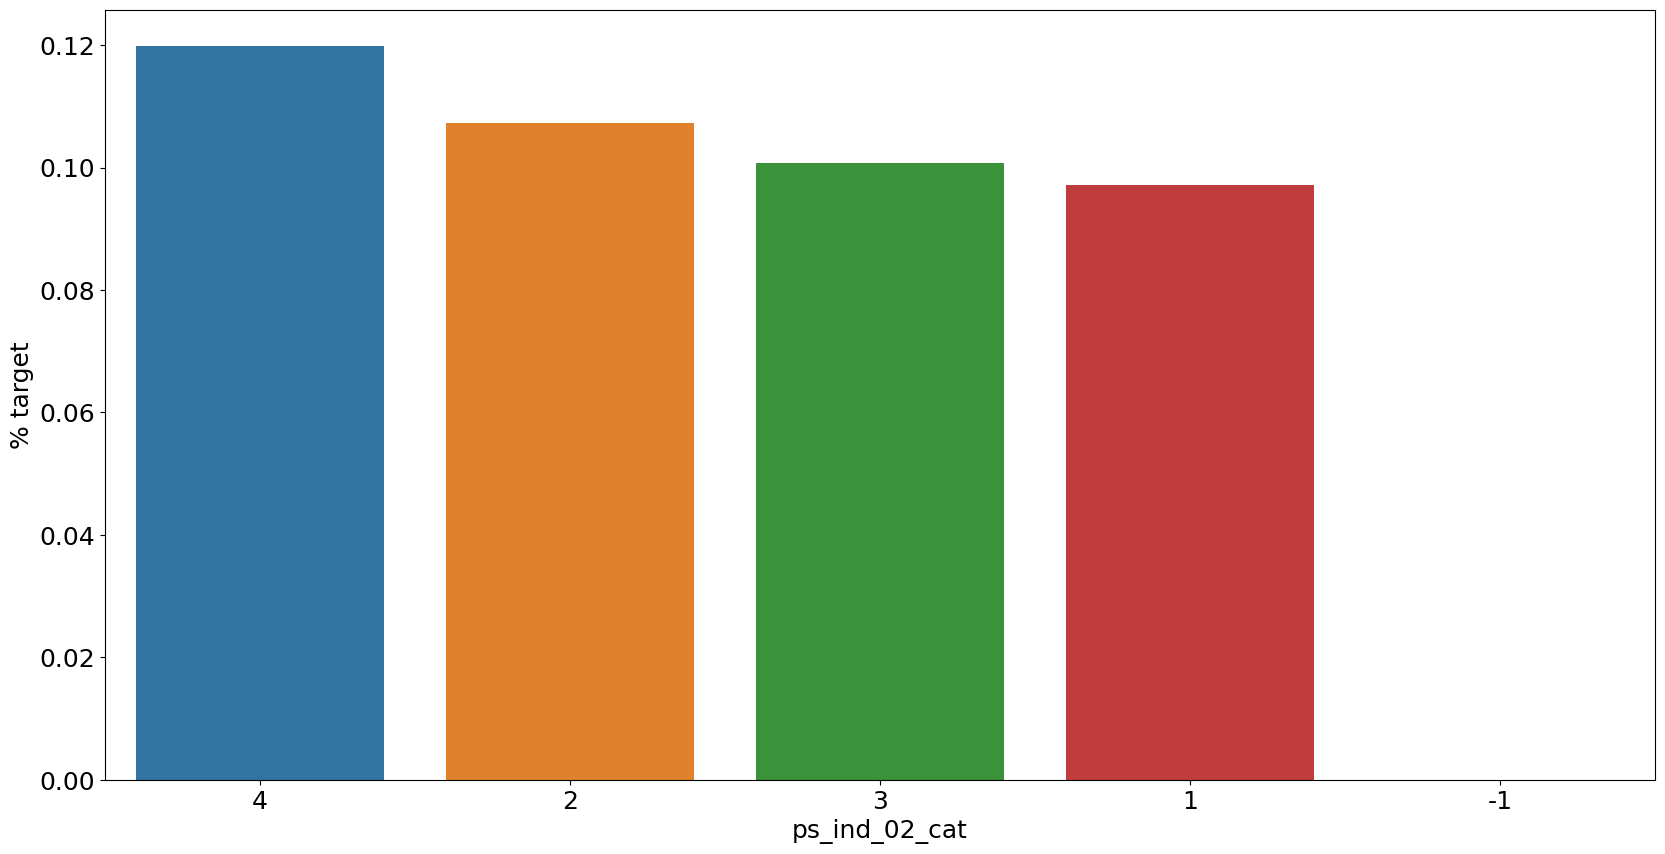

<Figure size 640x480 with 0 Axes>

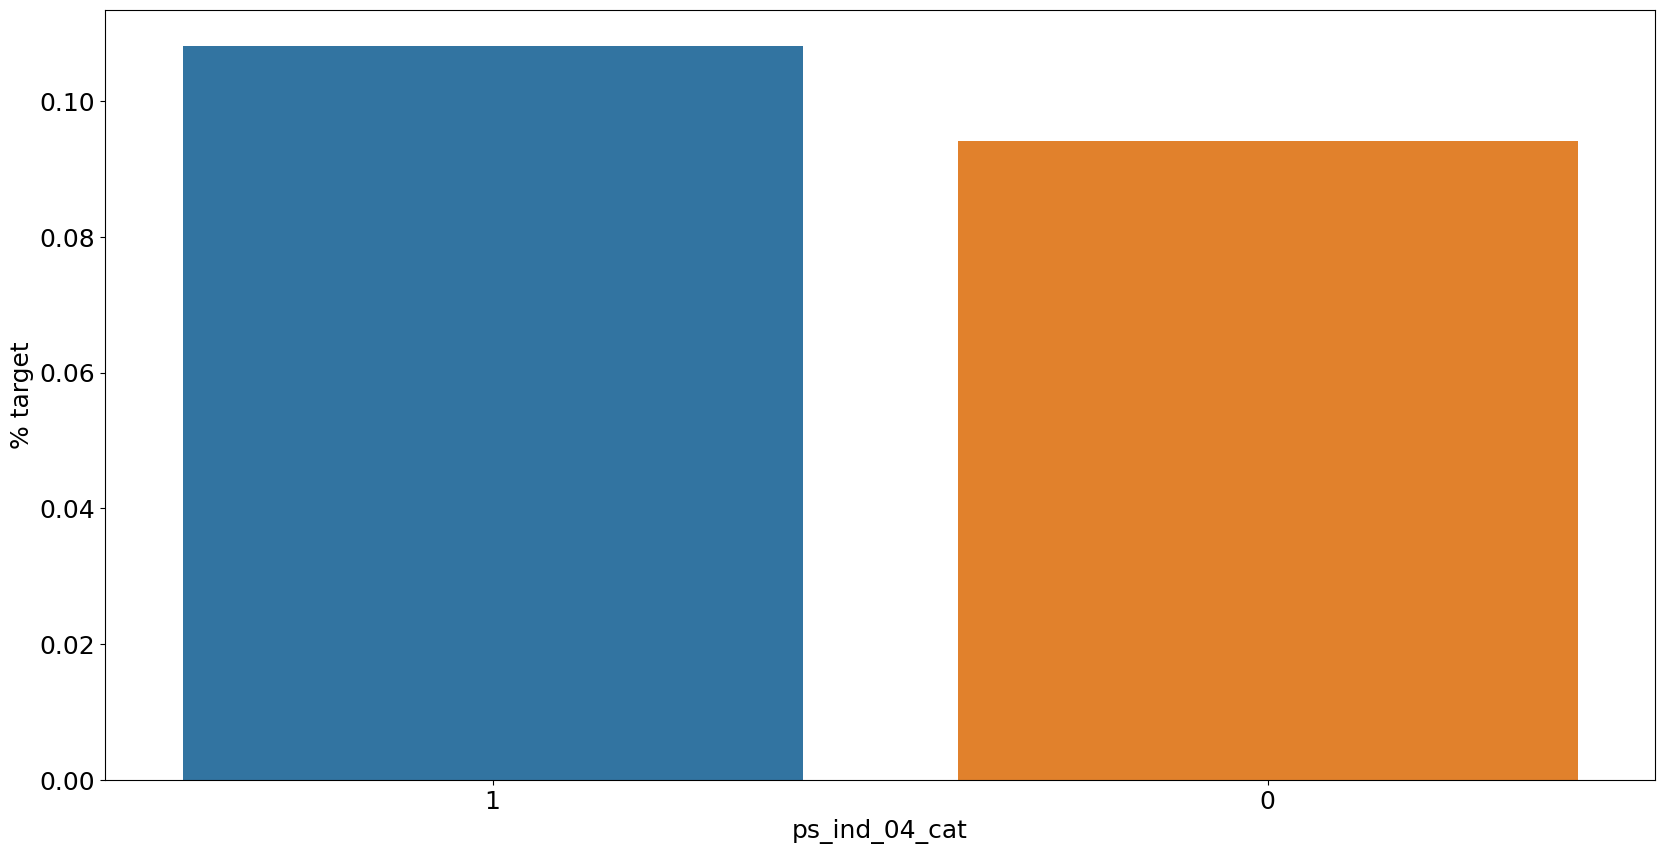

<Figure size 640x480 with 0 Axes>

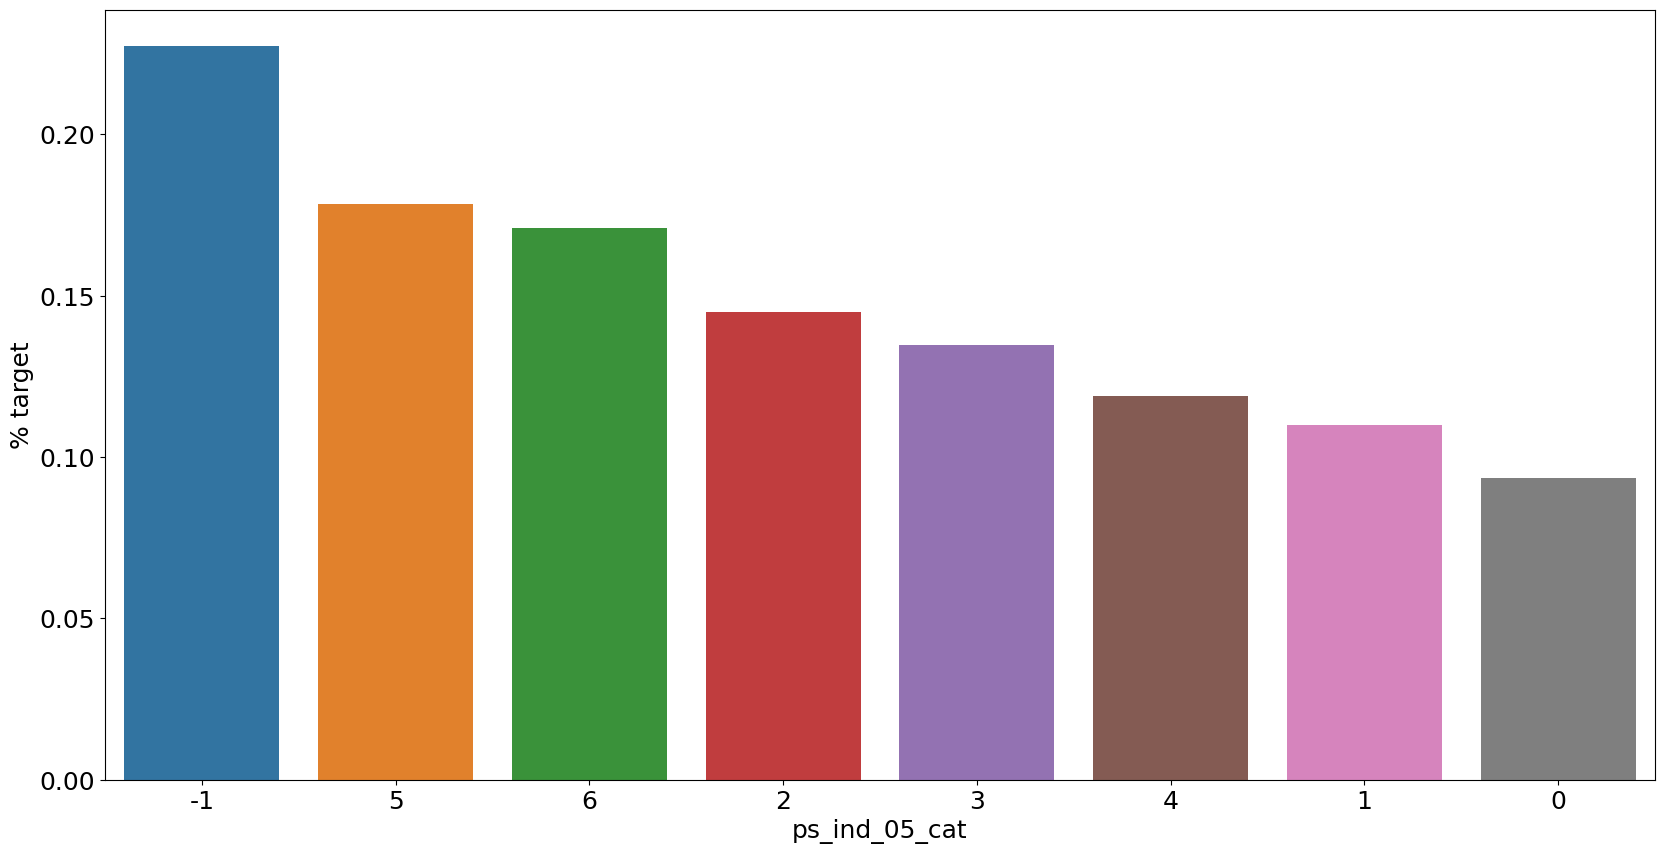

<Figure size 640x480 with 0 Axes>

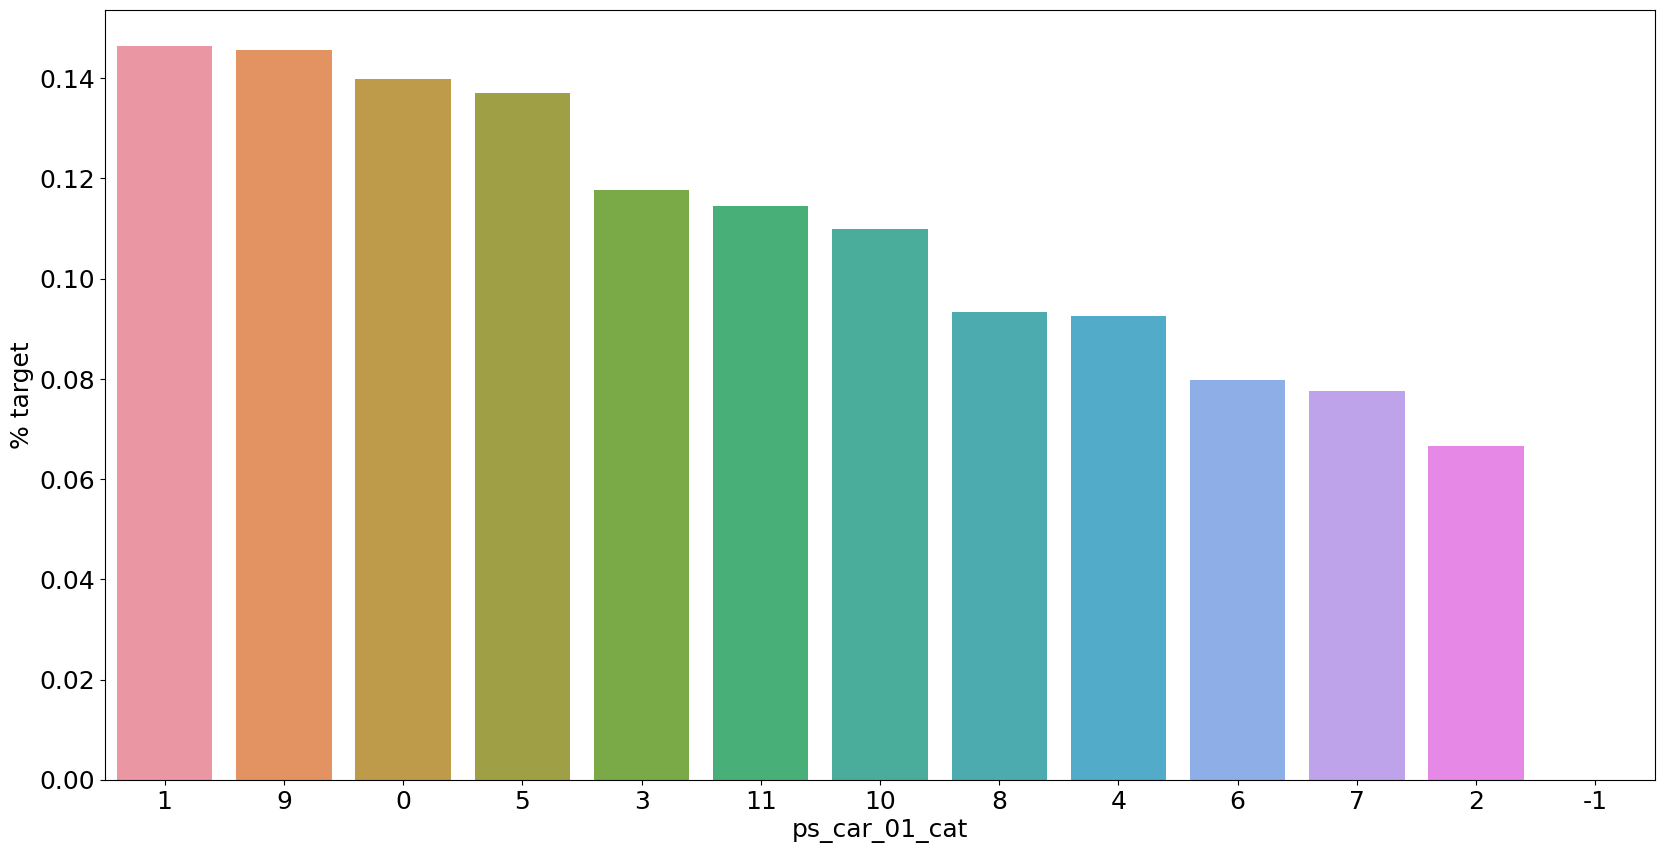

<Figure size 640x480 with 0 Axes>

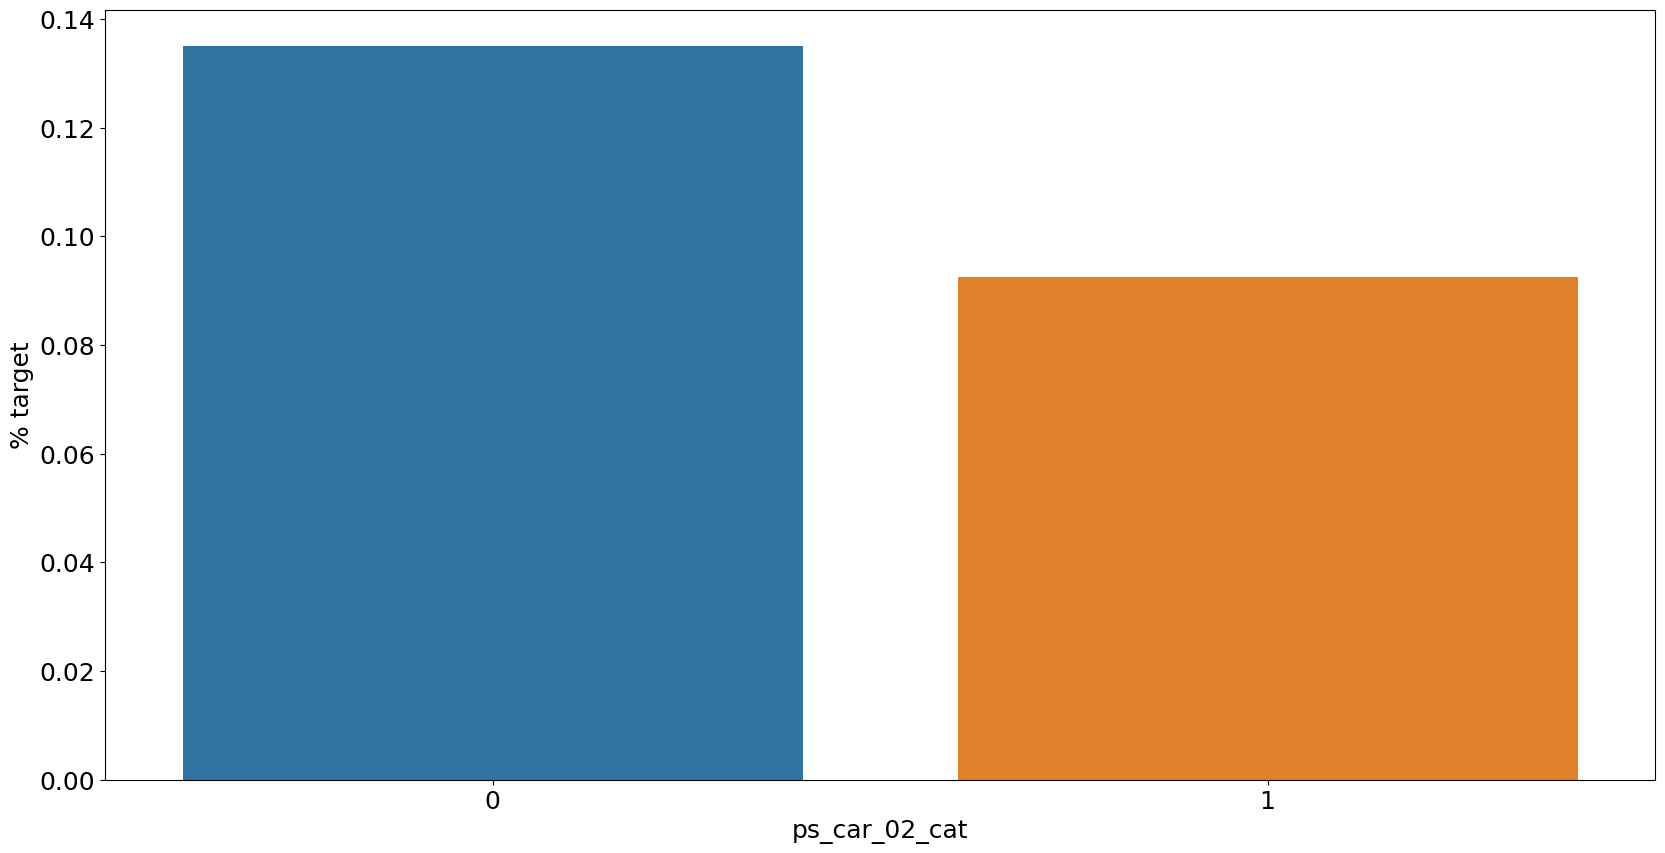

<Figure size 640x480 with 0 Axes>

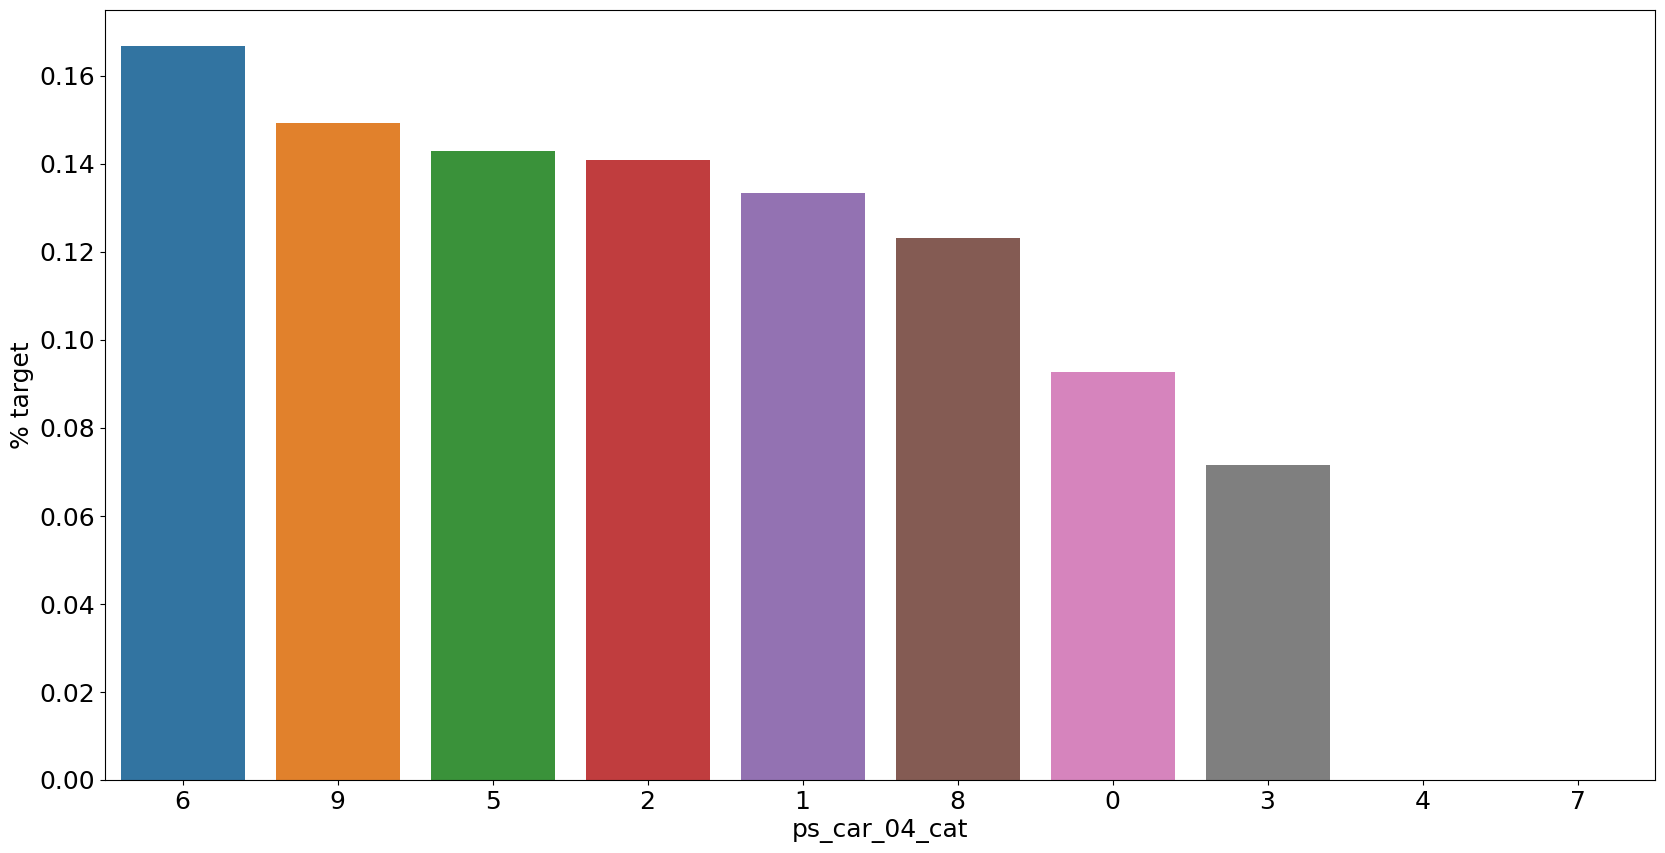

<Figure size 640x480 with 0 Axes>

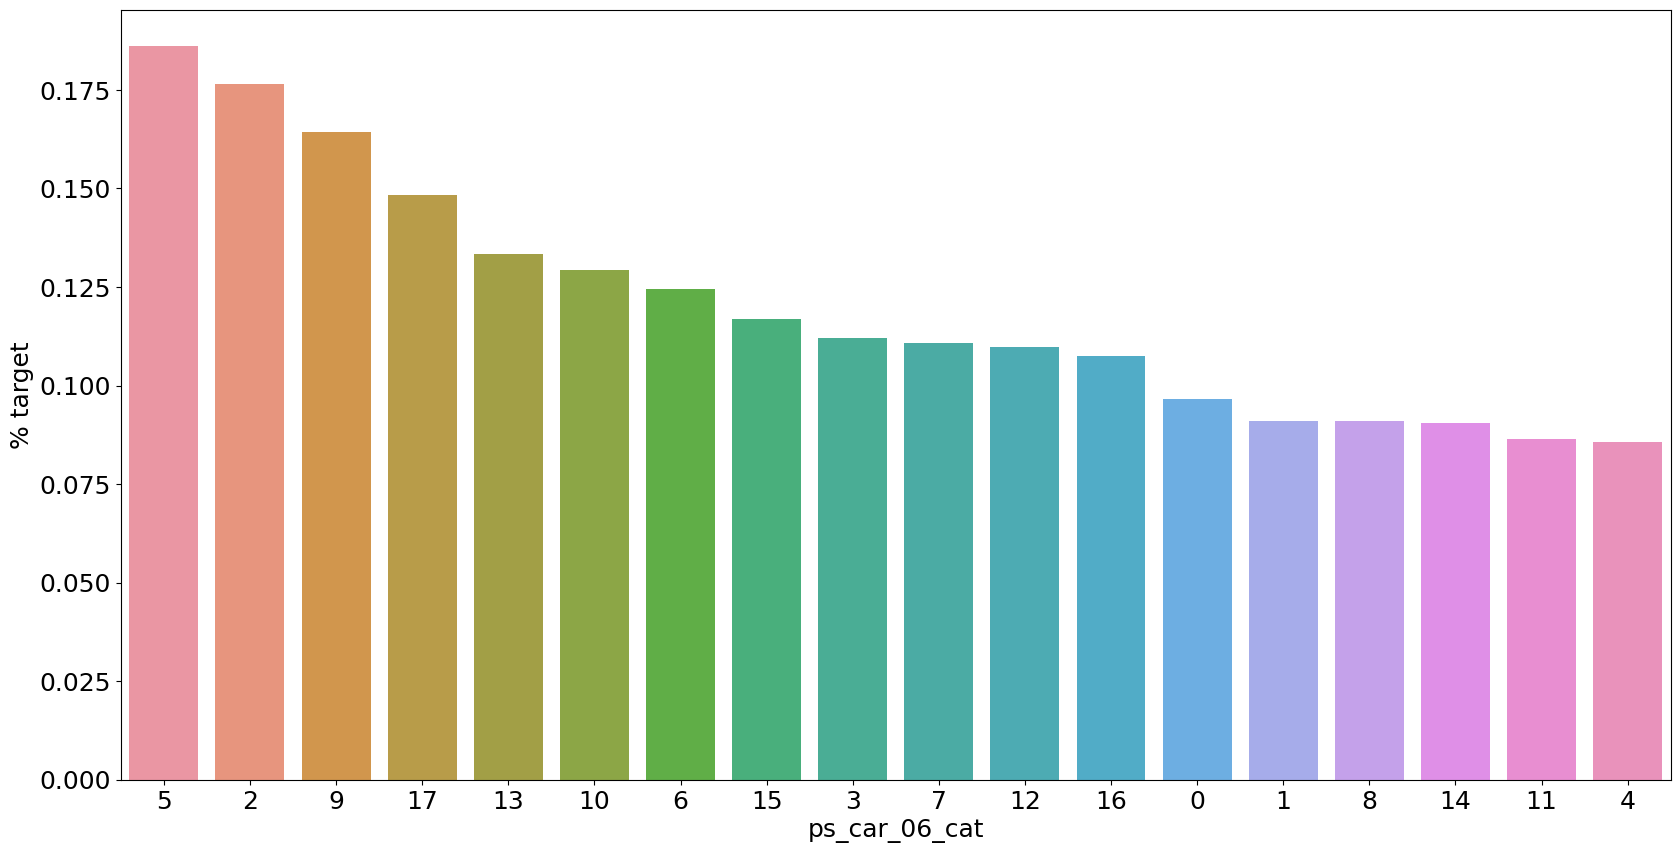

<Figure size 640x480 with 0 Axes>

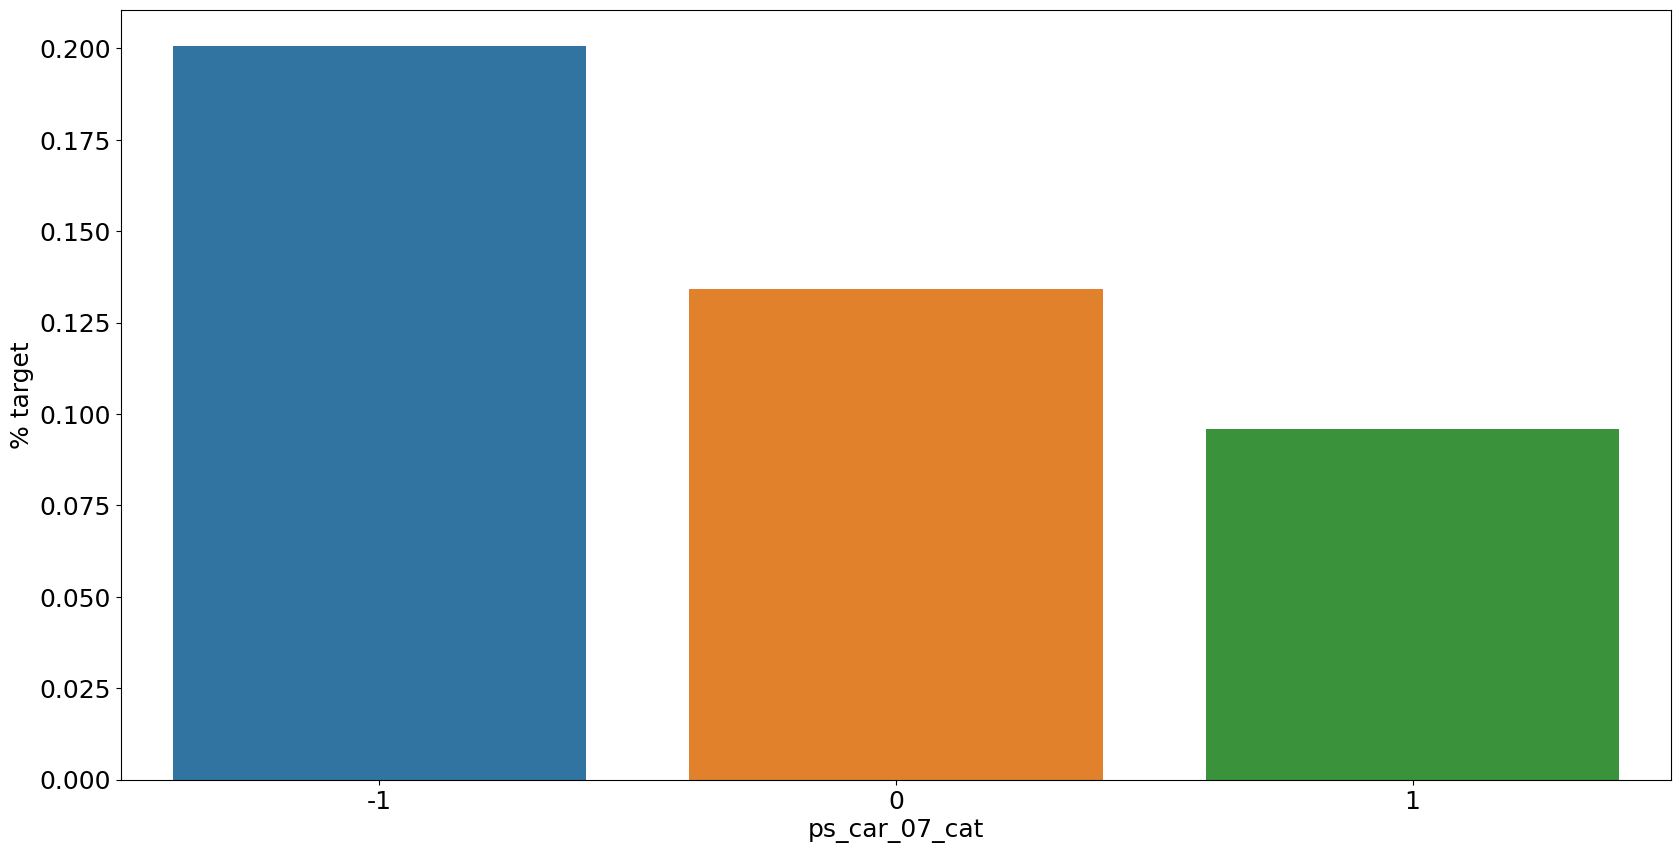

<Figure size 640x480 with 0 Axes>

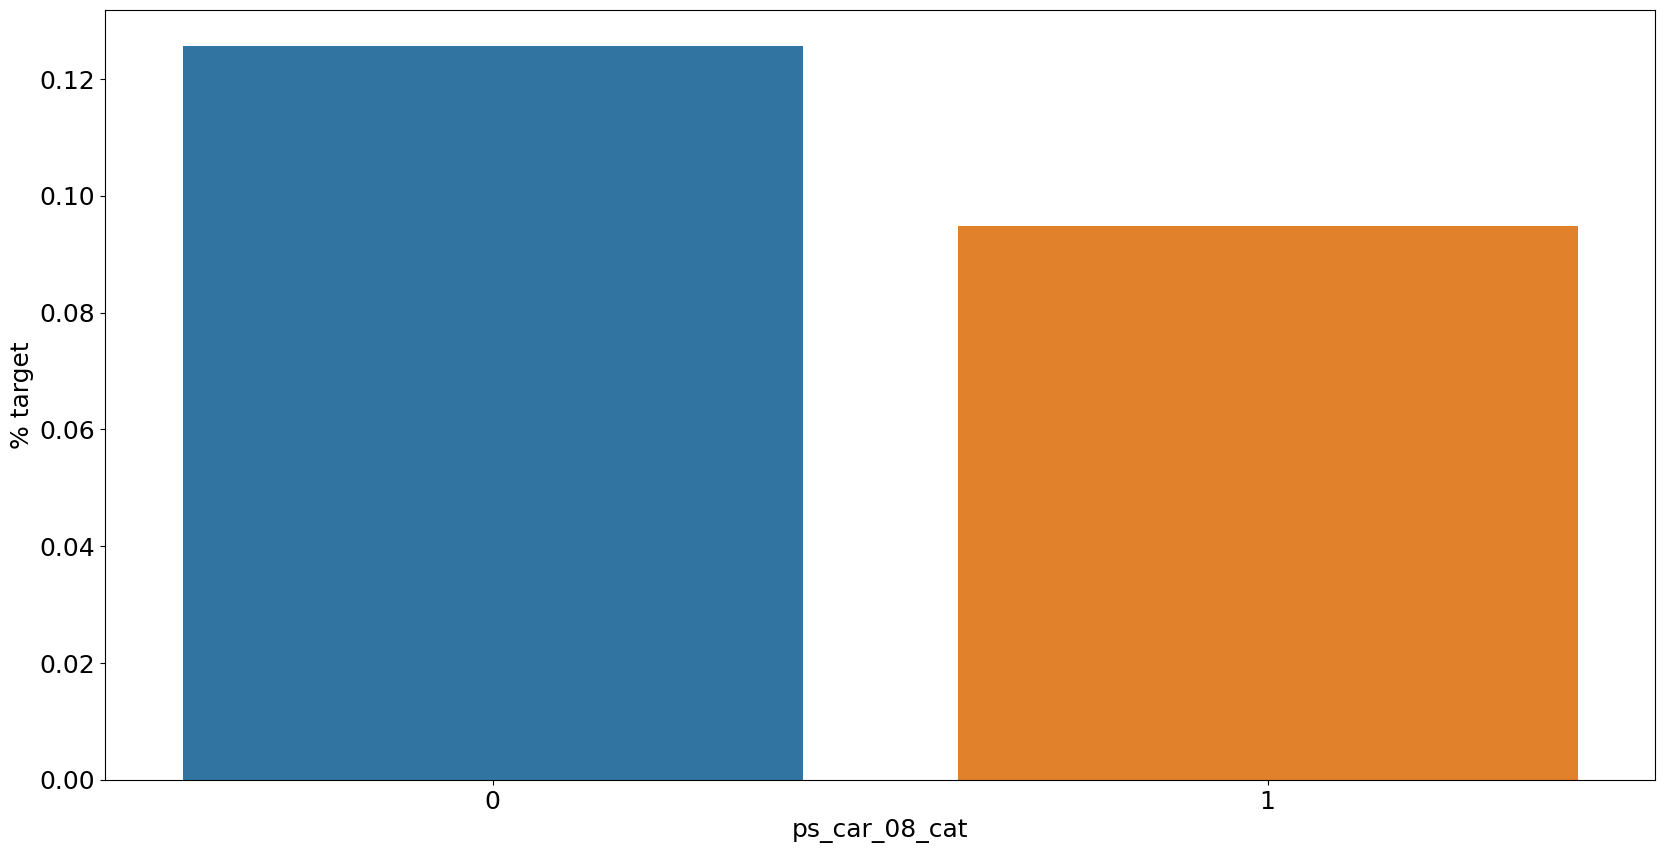

<Figure size 640x480 with 0 Axes>

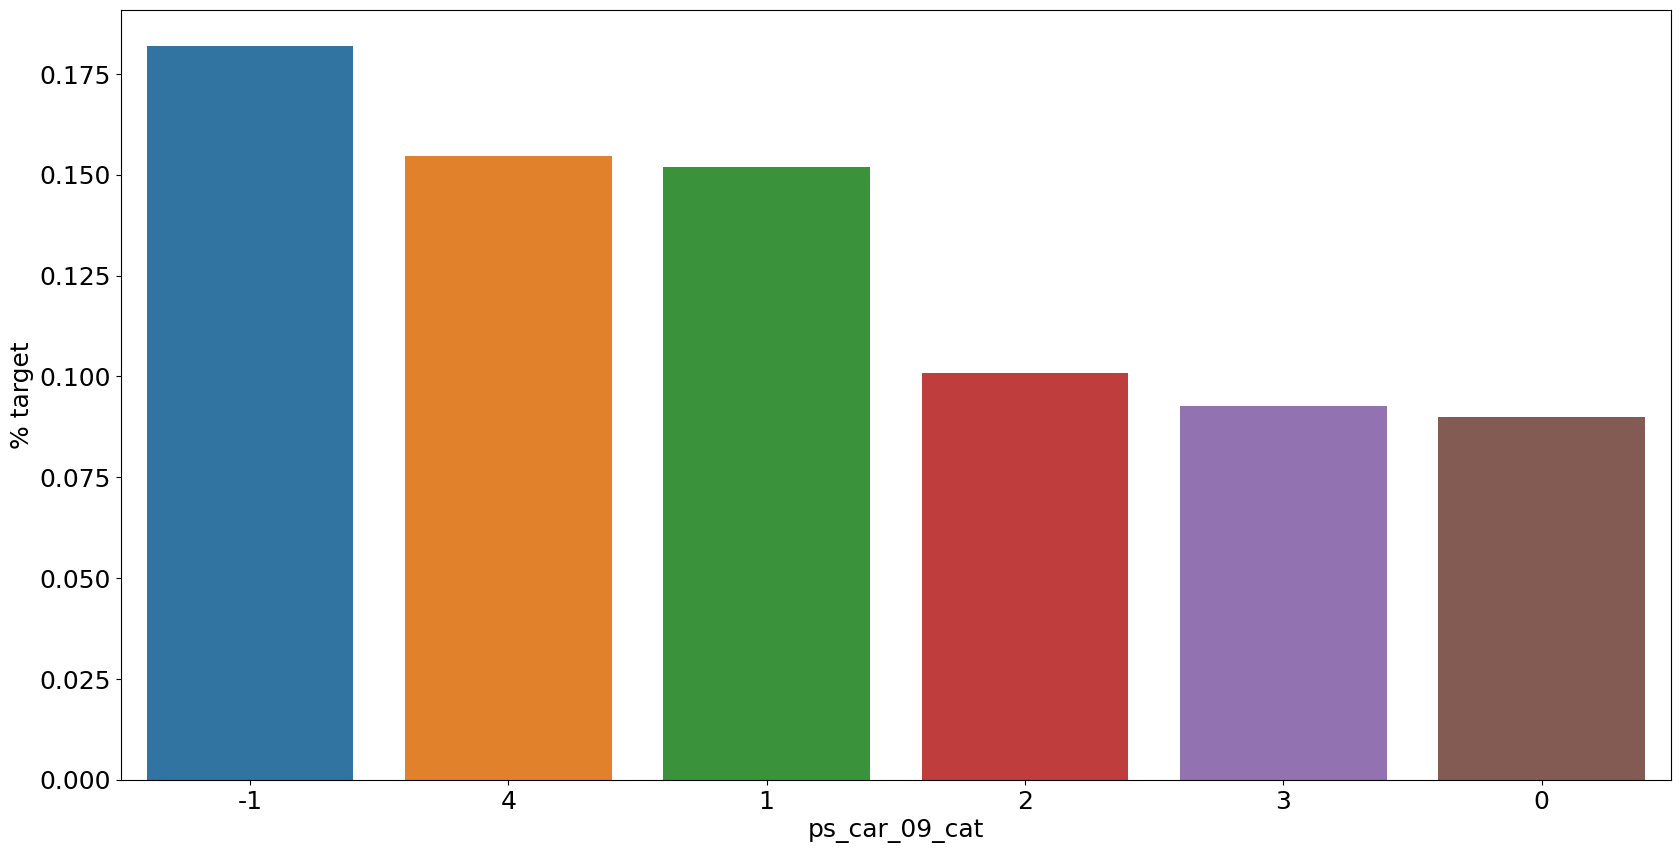

<Figure size 640x480 with 0 Axes>

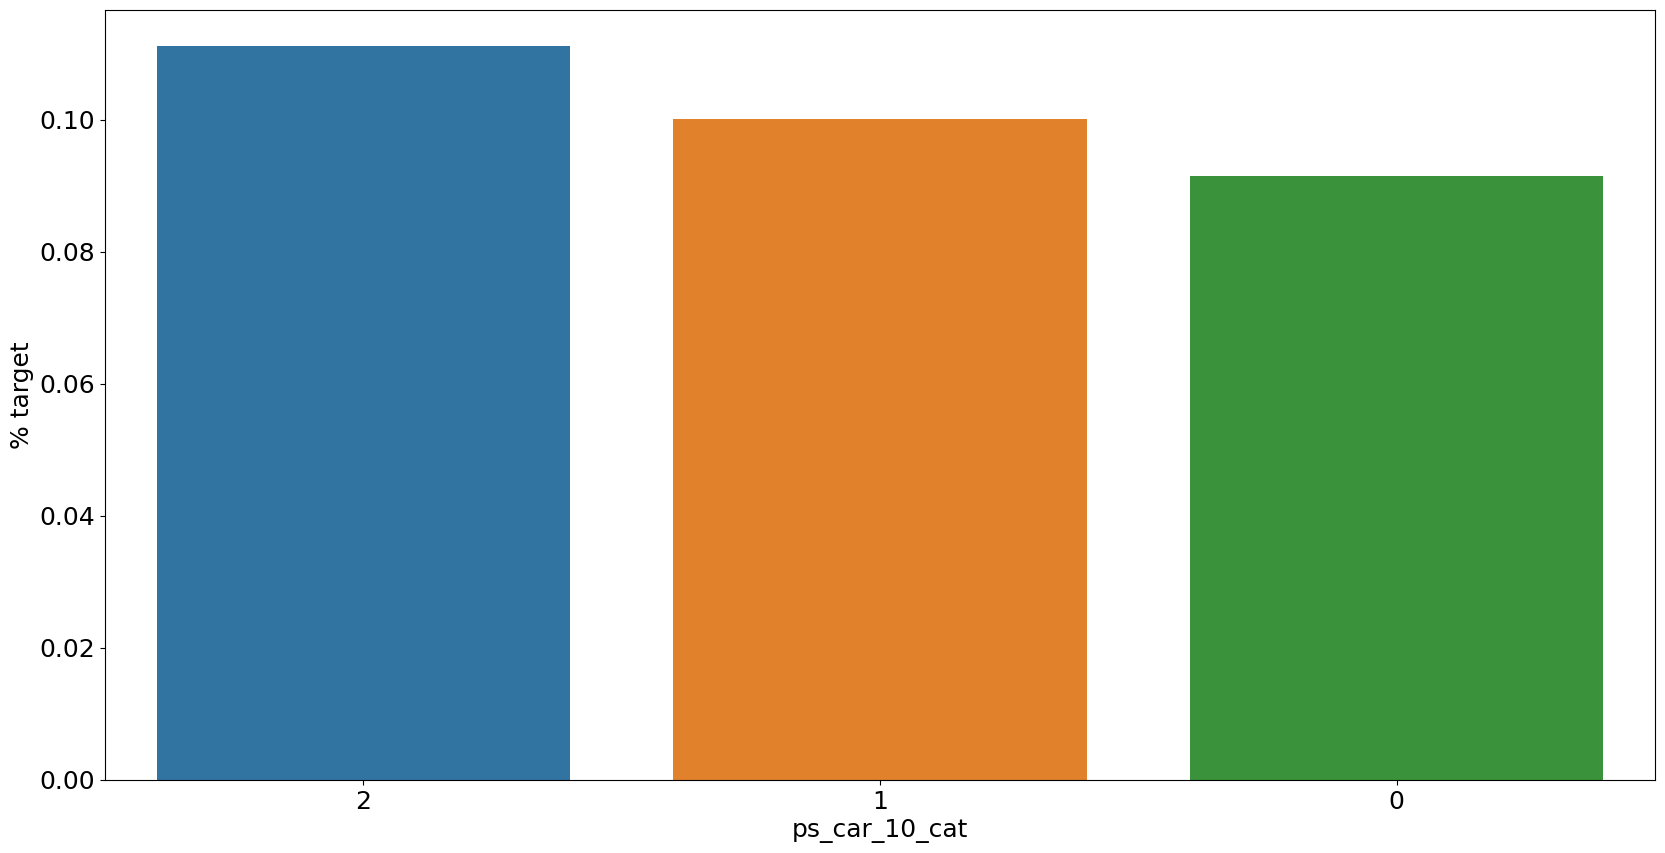

In [71]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20, 10))
    
    # 카테고리 값당 target=1의 비율을 계산합니다.
    cat_perc = train[[f, 'target']].groupby([f], as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    
    # Bar plot
    # 목표 평균을 기준으로 내림차순 막대 순서 지정
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

In [72]:
f = 'ps_car_02_cat'

In [73]:
cat_perc = train[[f, 'target']].groupby([f], as_index=False).agg(['mean', 'count'])
# cat_perc.sort_values(by='target', ascending=False, inplace=True)

In [74]:
cat_perc

ps_car_02_cat    target       
                     mean  count
0             0  0.134950   3216
1             1  0.092543  15074

ps_car_02_cat 피쳐에서 -1 데이터를 보고 좋다고 생각할 수 있지만, agg로 count를 해보면 고작 데이터가 2개밖에 없는 샘플이다. \
즉, -1인 값 = null인 값이 두 샘플 밖에 없는데 믿을만한 샘플 규모가 아니다.

결측값이 있는 변수에서 볼 수 있듯이 결측값을 모드별로 대체하는 대신 별도의 범주 값으로 유지하는 것이 좋습니다. 누락된 값이 있는 고객은 보험 청구를 요청할 가능성이 훨씬 더 높은(경우에 따라 훨씬 낮은) 것으로 보입니다.

#### 간격변수
간격 변수 간의 상관 관계를 확인합니다. 히트맵은 변수 간의 상관관계를 시각화하는 좋은 방법입니다. 아래 코드는 Michael Waskom의 예제를 기반으로 합니다.

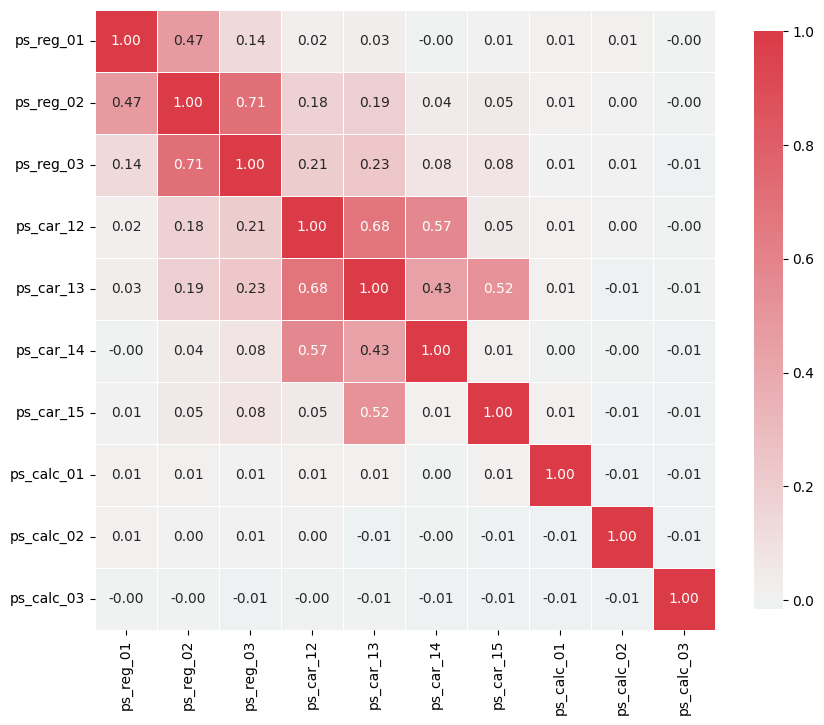

In [75]:
def corr_heatmap(v):
    correlations = train[v].corr()
    
    # 두 가지 색상 사이의 색상 맵 만들기
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
               square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
    
v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

변수 간에는 강한 상관관계가 있습니다.
- ps_reg_02 and ps_reg_03 (0.7)
- ps_car_12 and ps_car13 (0.67)
- ps_car_12 and ps_car14 (0.58)
- ps_car_13 and ps_car15 (0.67)

Seaborn에는 변수 간의 (선형) 관계를 시각화하는 몇 가지 편리한 플롯이 있습니다. 변수 간의 관계를 시각화하기 위해 *pairplot*을 사용할 수 있습니다. 그러나 히트맵에는 이미 제한된 수의 상관 변수가 표시되었으므로 상관 관계가 높은 각 변수를 별도로 살펴보겠습니다.

**참고**: 프로세스 속도를 높이기 위해 기차 데이터 샘플을 사용합니다.

In [76]:
s = train.sample(frac=0.1)

##### ps_reg_02 and ps_reg_03
회귀선에서 볼 수 있듯이 이러한 변수 간에는 선형 관계가 있습니다. 색상 매개변수 덕분에 target=0과 target=1에 대한 회귀선이 동일하다는 것을 알 수 있습니다.

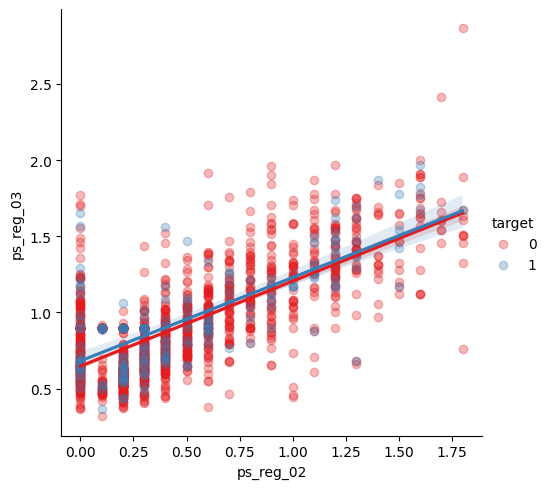

In [77]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

##### ps_car_12 and ps_car_13

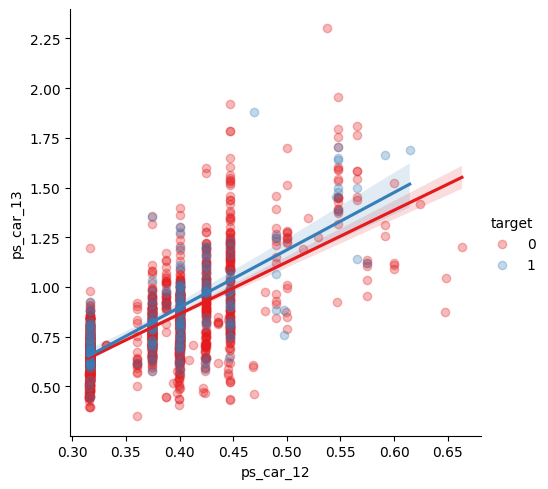

In [78]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

##### ps_car_12 and ps_car_14

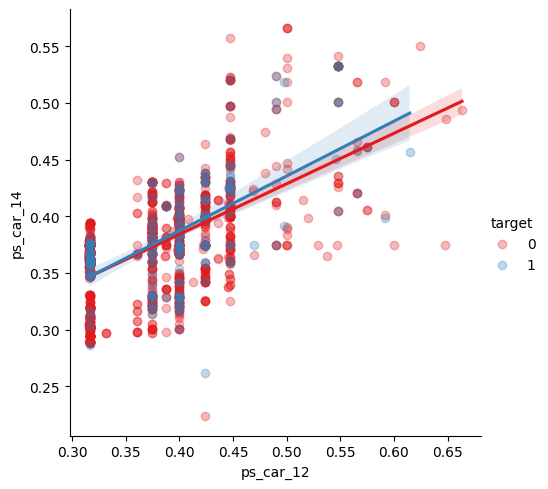

In [79]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

##### ps_car_13 and ps_car_15

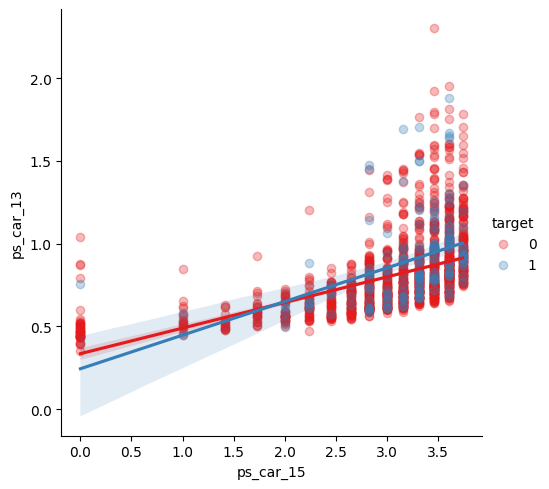

In [80]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

좋아요, 이제 어쩌죠? 상관관계가 있는 변수 중 어느 것을 유지할 것인지 어떻게 결정할 수 있나요? 차원을 줄이기 위해 변수에 대해 주성분 분석(PCA)을 수행할 수 있습니다. AllState Claims Severity Competition에서 저는 이 커널을 만들었습니다. 그러나 상관 변수의 수가 다소 낮기 때문에 모델이 무거운 작업을 수행하도록 하겠습니다.

#### Checking the correlations between ordinal variables

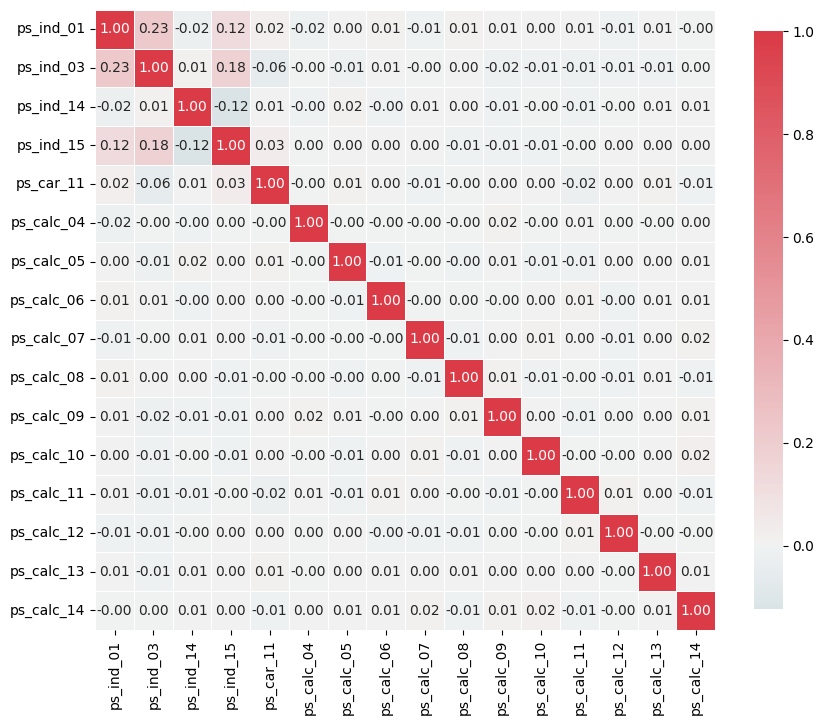

In [81]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

순서형 변수의 경우 상관관계가 많지 않습니다. 반면에 목표값을 기준으로 그룹화할 때 분포가 어떤지 살펴볼 수 있습니다.

### Feature engineering

#### 더미 변수 만들기
범주형 변수의 값은 순서나 크기를 나타내지 않습니다. 예를 들어 범주 2는 범주 1 값의 두 배가 아닙니다. 따라서 이를 처리하기 위해 더미 변수를 만들 수 있습니다. 이 정보는 원래 변수의 범주에 대해 생성된 다른 더미 변수에서 파생될 수 있으므로 첫 번째 더미 변수를 삭제합니다.

In [82]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 107 variables in train


따라서 더미 변수를 생성하면 훈련 세트에 52개의 변수가 추가됩니다.

#### Creating interaction variables

In [83]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names_out(v))
interactions.drop(v, axis=1, inplace=True) # 기존 칼럼 제거
# Concat the interaction variables to the train data
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 107 variables in train
After creating interactions we have 162 variables in train


이렇게 하면 기차 데이터에 추가 상호 작용 변수가 추가됩니다. get_feature_names 메소드 덕분에 이러한 새 변수에 열 이름을 할당할 수 있습니다.

### Feature selection

#### 분산이 낮거나 0인 변수 제거

개인적으로 나는 분류자 알고리즘이 유지할 기능을 선택하도록 하는 것을 선호합니다. 그러나 우리가 스스로 할 수 있는 일이 하나 있습니다. 이는 분산이 없거나 매우 낮은 기능을 제거하는 것입니다. Sklearn에는 이를 수행하는 편리한 방법인 VarianceThreshold가 있습니다. 기본적으로 분산이 0인 기능을 제거합니다. 이전 단계에서 제로 분산 변수가 없다는 것을 확인했으므로 이번 대회에는 적용할 수 없습니다. 그러나 분산이 1% 미만인 특징을 제거하면 31개의 변수가 제거됩니다.

In [84]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id', 'target'], axis=1)) # id, target 변수 빼고 학습

f = np.vectorize(lambda x : not x) # 참, 거짓 배열 요소를 토글하는 함수

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

28 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


분산을 기준으로 선택하면 오히려 많은 변수를 잃게 됩니다. 하지만 변수가 너무 많지 않기 때문에 분류자가 선택하도록 하겠습니다. 더 많은 변수가 포함된 데이터 세트의 경우 처리 시간이 단축될 수 있습니다.

Sklearn에는 다른 기능 선택 방법도 함께 제공됩니다. 이러한 방법 중 하나는 다른 분류자가 최상의 기능을 선택하고 이를 계속하도록 하는 SelectFromModel입니다. 아래에서는 Random Forest를 사용하여 이를 수행하는 방법을 보여 드리겠습니다.

<꿀팁(?)>
- 1000개의 피쳐가 있으면 피쳐를 1개씩 넣고 빼고해서, 피쳐 셀렉션을 하면 끝이 없다.
- 너무 오래 걸리기 때문에 block을 쓰게 되면 10개씩 또는 20개씩 하는게 효율적이다.

#### Random Forest와 SelectFromModel을 사용하여 특징 선택하기
여기서는 Random Forest의 기능 중요성을 기반으로 기능 선택을 수행합니다. Sklearn의 SelectFromModel을 사용하면 유지할 변수 수를 지정할 수 있습니다. 기능 중요도 수준에 대한 임계값을 수동으로 설정할 수 있습니다. 하지만 우리는 단순히 상위 50%의 최상의 변수를 선택하겠습니다.
* 아래 셀의 코드는 Sebastian Raschka의 GitHub 저장소에서 빌려온 것입니다. 이 저장소에는 반드시 읽어야 할 그의 저서 Python Machine Learning의 코드 샘플이 포함되어 있습니다.

In [85]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_11_cat_te               0.023464
 2) ps_car_13                      0.016501
 3) ps_car_13^2                    0.016438
 4) ps_reg_03 ps_car_13            0.016394
 5) ps_car_12 ps_car_13            0.016174
 6) ps_car_13 ps_car_15            0.016153
 7) ps_reg_01 ps_car_13            0.016003
 8) ps_car_13 ps_car_14            0.015910
 9) ps_reg_03 ps_car_14            0.015691
10) ps_reg_03 ps_car_12            0.015516
11) ps_car_14 ps_car_15            0.015367
12) ps_reg_03 ps_car_15            0.014947
13) ps_reg_01 ps_car_14            0.014794
14) ps_car_14^2                    0.014396
15) ps_reg_01 ps_reg_03            0.014189
16) ps_car_14                      0.014072
17) ps_car_13 ps_calc_03           0.013976
18) ps_car_12 ps_car_14            0.013914
19) ps_reg_03                      0.013850
20) ps_car_13 ps_calc_01           0.013819
21) ps_calc_10                     0.013735
22) ps_car_14 ps_calc_01           0.013687
23) ps_reg_03^2                 

SelectFromModel을 사용하면 사용할 사전 맞춤 분류기와 기능 중요도에 대한 임계값을 지정할 수 있습니다. get_support 메소드를 사용하면 열차 데이터의 변수 수를 제한할 수 있습니다.

In [88]:
sfm = SelectFromModel(rf, threshold='median', prefit=True) # prefit=True은 이미 학습한 랜덤포레스트를 그대로 쓰겠다는 뜻
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 160


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Number of features after selection: 80


In [89]:
train = train[selected_vars + ['target']]

In [90]:
train.shape

(18290, 81)

randomforest 이후로 등장한 부스팅 알고리즘으로 유명한 ligtgbm, XGboost 등의 알고리즘이 성능이 너무 좋아서 후자의 알고리즘은 gpu를 제공하지만, randomforest는 gpu를 제공하지 않음

### Feature scaling
앞서 언급했듯이 훈련 데이터에 표준 스케일링을 적용할 수 있습니다. 일부 분류기는 이 작업이 완료되면 더 나은 성능을 발휘합니다.
- linear한 것들 , 각각의 distribution에 영향을 받는 그런 모델들은 반드시 스케일링을 해야한다.
- Tree 기반 알고리즘 들은 안해줘도 된다. 얘네들은 그냥 짝대기 하나 그으면서 split하는 알고리즘이기 때문에 1~ 100 에 있던 것을 0~1로 스케일링 해줬다고 해서 걔네들 사이의 amplitude(진폭)는 똑같다. 다를 게 없다.

In [92]:
# StandardScaler = 각 피쳐에 평균과 standard deviation(표준편차) 값을 구해서 저장해 놓는 것
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1)) # fit을 사용해줬으니 위 통계량 값을 가지고 있는 상태이다.

array([[ 0.05199948,  0.93854861,  0.20647996, ..., -0.45904446,
         0.19910639,  0.2856679 ],
       [-0.95389219, -0.16038362, -0.35722158, ...,  0.76725619,
         0.04841718, -0.72139497],
       [-0.45094635, -0.52669436, -0.35722158, ..., -0.90497196,
        -0.2027315 ,  1.3300294 ],
       ...,
       [-0.45094635, -0.52669436, -1.76647541, ...,  1.95639621,
         0.34979561, -0.72139497],
       [ 2.56672866,  1.30485935,  1.61573379, ...,  0.76725619,
        -0.30319098, -0.90788809],
       [-0.45094635,  0.93854861, -0.63907234, ..., -0.45904446,
        -1.0064073 , -1.05708259]])

In [93]:
scaler.mean_

array([ 1.89661017,  4.43783488,  7.26741389,  0.61484964,  0.44539092,
        0.89843318,  0.38036613,  0.81795134,  0.37477842,  3.08095757,
        0.45131766,  0.44797157,  0.44859486,  2.37260798,  1.89573537,
        7.68141061,  2.99393111,  9.22750137,  2.33635867,  8.45899399,
        5.42618917,  1.43821761,  2.86528157,  7.56779661,  0.09648748,
        0.46001531,  0.32923401,  0.56520049,  0.23427088,  0.50480219,
        0.23037317,  1.89553494,  0.27838218,  0.27628978,  0.27557354,
        0.36668015,  0.49256236,  0.17364235,  0.38185593,  0.16773021,
        1.3882172 ,  0.20234117,  0.20000328,  0.19967031,  0.90790059,
        0.34560713,  0.75155725,  0.3377994 ,  2.78590302,  0.40624258,
        0.40293992,  0.40238591,  0.14806337,  0.32001877,  0.14402607,
        1.17403763,  0.17184082,  0.17044871,  0.1705478 ,  0.71972702,
        0.31082428,  2.60510743,  0.36997225,  0.36574489,  0.36655445,
        0.14240045,  1.15499713,  0.16915771,  0.16785363,  0.16

In [94]:
scaler.var_

array([3.95327993e+00, 7.45247776e+00, 1.25881399e+01, 8.19752234e-02,
       1.68307078e-01, 1.00718407e-01, 3.38497847e-03, 5.06826281e-02,
       1.94158511e-03, 5.19072784e-01, 8.24479631e-02, 8.28512709e-02,
       8.21732580e-02, 1.26099927e+00, 1.28377077e+00, 1.79620446e+00,
       2.00100199e+00, 2.13539458e+00, 1.53683551e+00, 8.41059297e+00,
       5.37752080e+00, 1.45427479e+00, 2.87829709e+00, 7.64168574e+00,
       6.57784685e-04, 9.40041988e-02, 1.32272661e-01, 1.43785164e-01,
       1.35371720e-02, 7.97427615e-02, 1.22770737e-02, 1.01434587e+00,
       5.49521940e-02, 5.47234896e-02, 5.41274923e-02, 3.73567349e-01,
       4.10459708e-01, 2.92871815e-02, 1.71390379e-01, 2.50789387e-02,
       1.86729915e+00, 6.54613642e-02, 6.40283324e-02, 6.36460969e-02,
       4.90023156e-01, 2.17170737e-02, 1.58862972e-01, 1.69315696e-02,
       1.51149812e+00, 9.64918899e-02, 9.59201513e-02, 9.43341216e-02,
       2.33093331e-03, 1.87751145e-02, 1.31293851e-03, 1.11733992e-01,
      

In [ ]:
scaler.transform(test)

아주 핵심인 것
- take home message

- scaling할 때 train으로 먼저 fitting 시키고 그 다음에 test transform 하는것

옳은 예시

In [ ]:
# 옳은 예시

scaler = StandardScaler()

df_train = scaler.fit_transform(df_train)
df_test = scaler.transform(df_test)

틀린 예시

In [ ]:
# 틀린 예시

scaler = StandardScaler()

df_train = scaler.fit_transform(df_train)
df_test = scaler.fit_transform(df_test)